<a href="https://colab.research.google.com/github/priyaregit/Classification-ML_Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/priyaregit/Classification-ML_Insurance-Cross-Sell-Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay , RocCurveDisplay

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Reading the data set from Google drive and storing it as dataframe: df

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Classification/Health Insurance Cross Sell Prediction.csv')


### Dataset First View

In [19]:
# Dataset First Look

# Checking the head (i.e. first 5 rows) of df
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [20]:
# Dataset Rows & Columns count

# Checking the shape of df
df.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info

# Checking information about dataset 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f"The duplicate data present in df is: {df.duplicated().sum()}")

The duplicate data present in df is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(f"The number of missing/null values in dataset 'df' are: \n")
print(df.isnull().sum())

The number of missing/null values in dataset 'df' are: 

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


<Axes: >

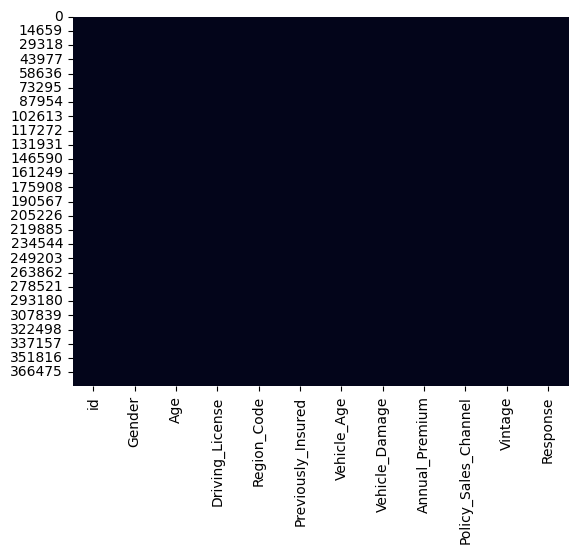

In [ ]:
# Visualizing the missing values

# Checking for missing/null values by plotting Heatmap of df
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset has 381,109 rows and 12 columns.

There are neither any missing values nor any duplicate values in the dataset.

The features: 'Gender', 'Vehicle_Age' and 'Vehicle_Damage' are of object data type. The rest of the features are either of integer or float data type.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f"The columns in the dataset are: \n",list(df.columns))

The columns in the dataset are: 
 ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [ ]:
# Dataset Describe

# Checking for statistics of the numeric columns
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


The youngest health insurance customer is 20 years old and the oldest one is 85 years old. The average age of the customers is 38.8 years.

The annual premium for vehicle insurance ranges between 2630 and 540,165. The mean premium is 30,564 and the median value is 31,669.

The customers have been associated with the company for a time period ranging from 10 days to 299 days.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in id is 381109
No. of unique values in Gender is 2
No. of unique values in Age is 66
No. of unique values in Driving_License is 2
No. of unique values in Region_Code is 53
No. of unique values in Previously_Insured is 2
No. of unique values in Vehicle_Age is 3
No. of unique values in Vehicle_Damage is 2
No. of unique values in Annual_Premium is 48838
No. of unique values in Policy_Sales_Channel is 155
No. of unique values in Vintage is 290
No. of unique values in Response is 2


### Variables Description

The variables/features present in the dataset are:

* id : unique ID of each customer
* Gender : whether the customer is Male or Female
* Age : age of the customer
* Driving_License : indicates whether the customer has driving license or not. 0 = No, 1 = Yes
* Region_Code : unique code for the region of the customer
* Previously_Insured : indicates whether the customer already has vehicle insurance or not. 0 = No, 1 = Yes
* Vehicle_Age : gives the age of the vehicle which can either be < 1 year, 1-2 years or > 2 years
* Vehicle_Damage : indicates whether the vehicle was previously damaged or not
* Annual_Premium : amount which the customer needs to pay as premium
* Policy_Sales_Channel : anonymized code for the channel of outreach to the customer i.e. different agents, over mail, over phone, in person, etc.
* Vintage : gives the number of days the customer has been associated with the company
* Response: indicates whether the customer is interested in vehicle insurance or not. 0 = No, 1 = Yes

## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready.

def age_group(age):

  if 20<=age<30:
    agegroup = "20-29"
  elif 30<=age<40:
    agegroup = "30-39"
  elif 40<=age<50:
    agegroup = "40-49"
  elif 50<=age<60:
    agegroup = "50-59"
  elif 60<=age<70:
    agegroup = "60-69"
  elif 70<=age<80:
    agegroup = "70-79"
  elif age>=80:
    agegroup = ">=80"
  else:
    agegroup = "others"

  return agegroup

In [27]:
df['Age_Group'] = df['Age'].apply(age_group)

In [24]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,70-79
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,30-39
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,20-29
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,60-69
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0,40-49


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

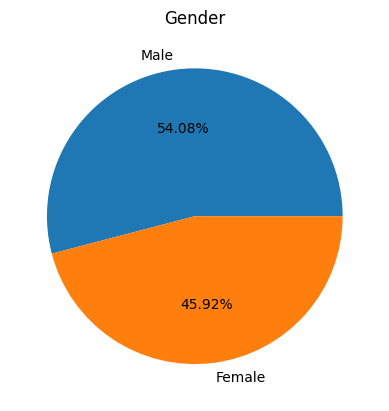

In [ ]:
# Chart - 1 visualization code

# Plotting a Pie Chart to visualize the number of customers by Gender
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Gender", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
# Finding the value count of each Gender type
df['Gender'].value_counts().reset_index().rename(columns={'index':'Gender','Gender': 'Count'})

,Gender,Count
0,Male,206089
1,Female,175020


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

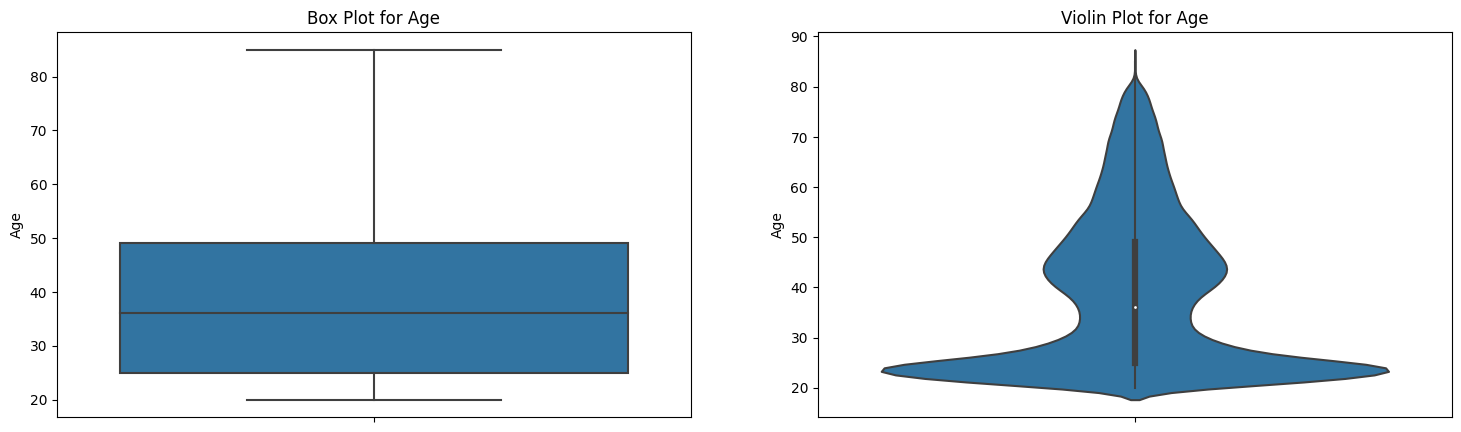

In [39]:
# Chart - 2 visualization code

# Setting display figure size
fig = plt.figure(figsize = (18,5))

# Box plot to check for the distribution of customers' age
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(y=df['Age'])
plt.title("Box Plot for Age")

# Violin plot to check for the distribution of customers' age
ax1 = plt.subplot2grid((1,2),(0,1))
sns.violinplot(y=df['Age'])
plt.title("Violin Plot for Age")

plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

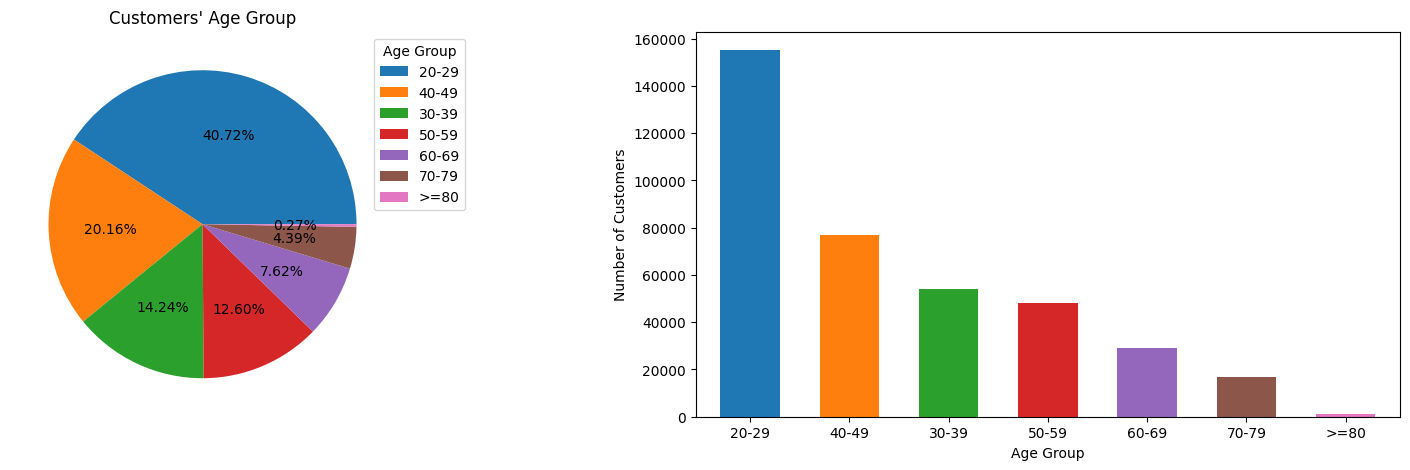

In [68]:
# Chart - 3 visualization code

# Setting display figure size
fig = plt.figure(figsize = (20,5))

# Pie chart to check for the customers' age group
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['Age_Group'].value_counts(), autopct = "%.02f%%")
plt.title("Customers' Age Group", fontsize = 12)
plt.legend(df['Age_Group'].value_counts().index, title = "Age Group", loc ='upper right',bbox_to_anchor=(0.7, 0, 0.5, 1))

# Bar chart to check for the customers' age group
ax1 = plt.subplot2grid((1,2),(0,1))
ageG = df["Age_Group"].value_counts()
ageG.plot.bar(width = 0.6, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

In [29]:
ageG

20-29    155203
40-49     76846
30-39     54253
50-59     48034
60-69     29023
70-79     16712
>=80       1038
Name: Age_Group, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

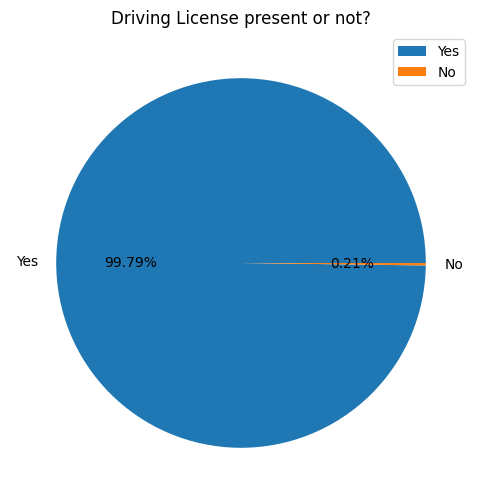

In [ ]:
# Chart - 4 visualization code

# Plotting a Pie Chart to visualize if the customers have driving license or not
plt.pie(df['Driving_License'].value_counts(), labels = ['Yes','No'], autopct = "%.02f%%")

# Giving title and legend to the plot
plt.title("Driving License present or not?", fontsize = 12)
plt.legend(['Yes', 'No'])

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
# Finding the value count of possession of driving license
df['Driving_License'].value_counts().reset_index().rename(columns={'index':'DL Present?','Driving_License': 'Count'})

,DL Present?,Count
0,1,380297
1,0,812


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

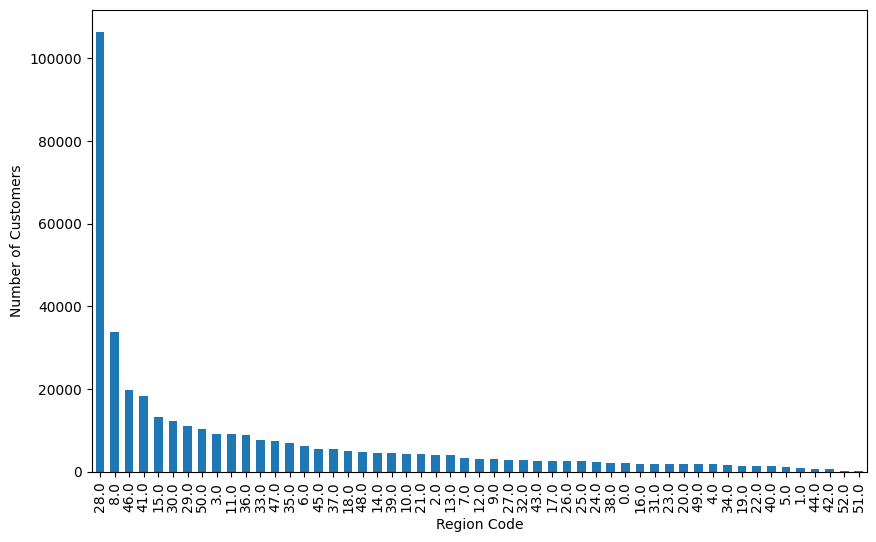

In [49]:
# Chart - 5 visualization code

# Finding the value count of the region code of the customers
rc = df["Region_Code"].value_counts()

rc.plot.bar(width = 0.6)
plt.xlabel("Region Code")
plt.ylabel("Number of Customers")

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
rc

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

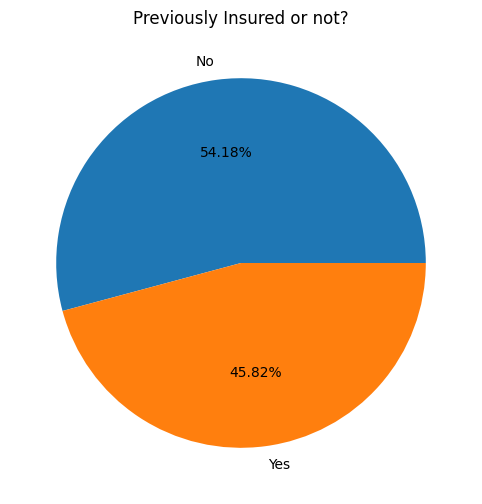

In [ ]:
# Chart - 6 visualization code

# Plotting a Pie Chart to visualize if the customers were previously insured or not
plt.pie(df['Previously_Insured'].value_counts(), labels = ['No','Yes'], autopct = "%.02f%%")

# Giving title to the plot
plt.title("Previously Insured or not?", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
# Finding the value count of whether previously insured or not
df['Previously_Insured'].value_counts().reset_index().rename(columns={'index':'Previously insured or not?','Previously_Insured': 'Count'})

,Previously insured or not?,Count
0,0,206481
1,1,174628


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

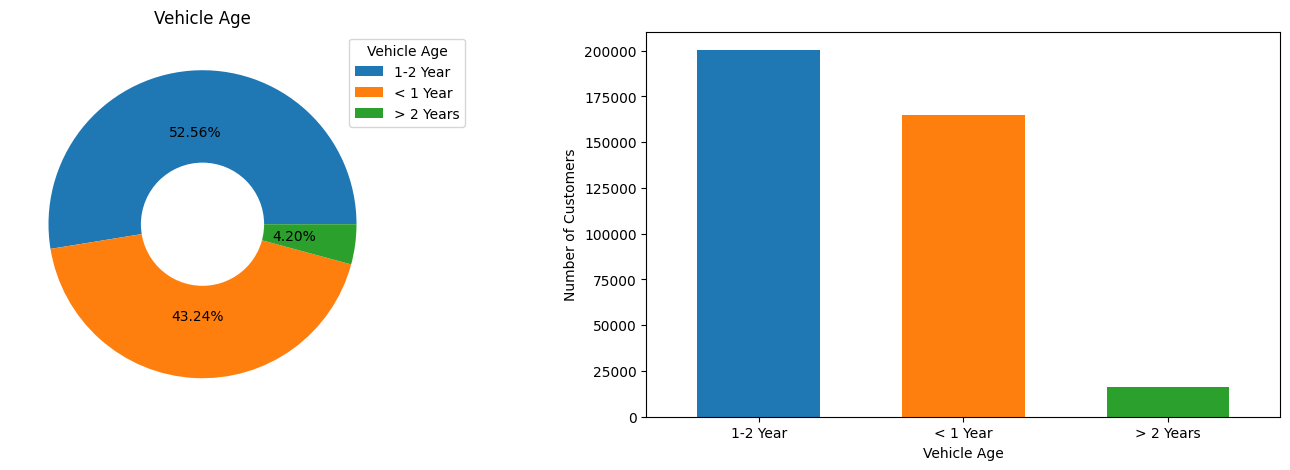

In [62]:
# Chart - 7 visualization code

vehicle_age = df['Vehicle_Age'].value_counts()

# Setting display figure size
fig = plt.figure(figsize = (18,5))

# Donut chart to check for the vehicles' age
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['Vehicle_Age'].value_counts(), startangle = 0, autopct = "%.02f%%")
hole = plt.Circle((0, 0), 0.4, facecolor='white')  # Adding a hole in the pie - a white-colored circle of radius 0.4
plt.gcf().gca().add_artist(hole)
plt.title("Vehicle Age", fontsize = 12)
plt.legend(df['Vehicle_Age'].value_counts().index, title = "Vehicle Age", loc ='upper right',bbox_to_anchor=(0.7, 0, 0.5, 1))

# Bar chart to check for the vehicles' age
ax1 = plt.subplot2grid((1,2),(0,1))
vehicle_age.plot.bar(width = 0.6, color = ['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 'horizontal')

plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
# Finding the value count of the vehicle age
df['Vehicle_Age'].value_counts().reset_index().rename(columns={'index':'Vehicle_Age','Vehicle_Age': 'Count'})

,Vehicle_Age,Count
0,1-2 Year,200316
1,< 1 Year,164786
2,> 2 Years,16007


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

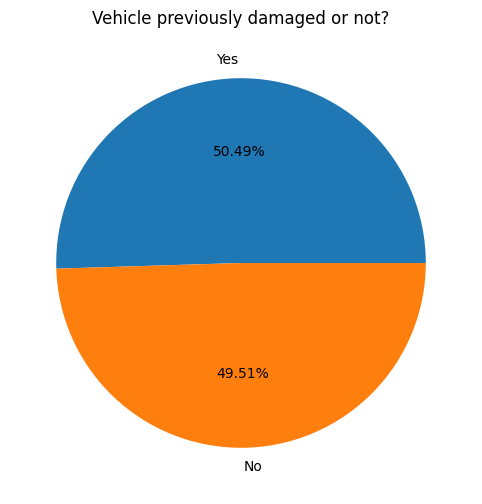

In [34]:
# Chart - 8 visualization code

# Plotting a Pie Chart to visualize if the customers' vehicle was previously damaged or not
plt.pie(df['Vehicle_Damage'].value_counts(), labels = df['Vehicle_Damage'].value_counts().index, autopct = "%.02f%%")

# Giving title to the plot
plt.title("Vehicle previously damaged or not?", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

In [33]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

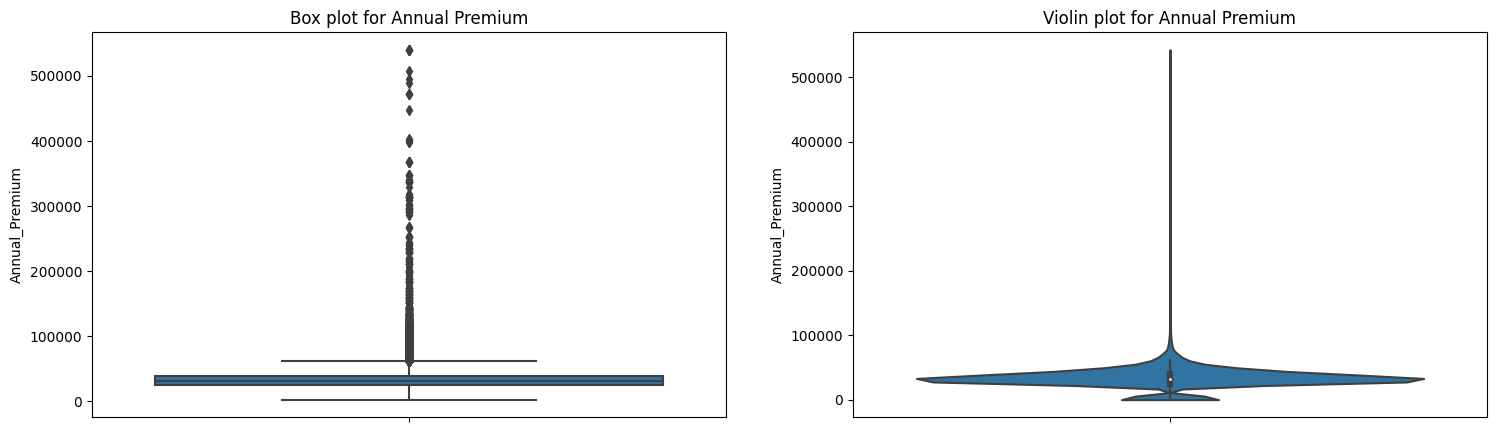

In [69]:
# Chart - 9 visualization code

# Setting display figure size
fig = plt.figure(figsize = (18,5))

# Box Plot to check for the distribution of Annual Premium
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(y=df['Annual_Premium'])
plt.title("Box plot for Annual Premium")

# Violin Plot to check for the distribution of Annual Premium
ax1 = plt.subplot2grid((1,2),(0,1))
sns.violinplot(y=df['Annual_Premium'])
plt.title("Violin plot for Annual Premium")

plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

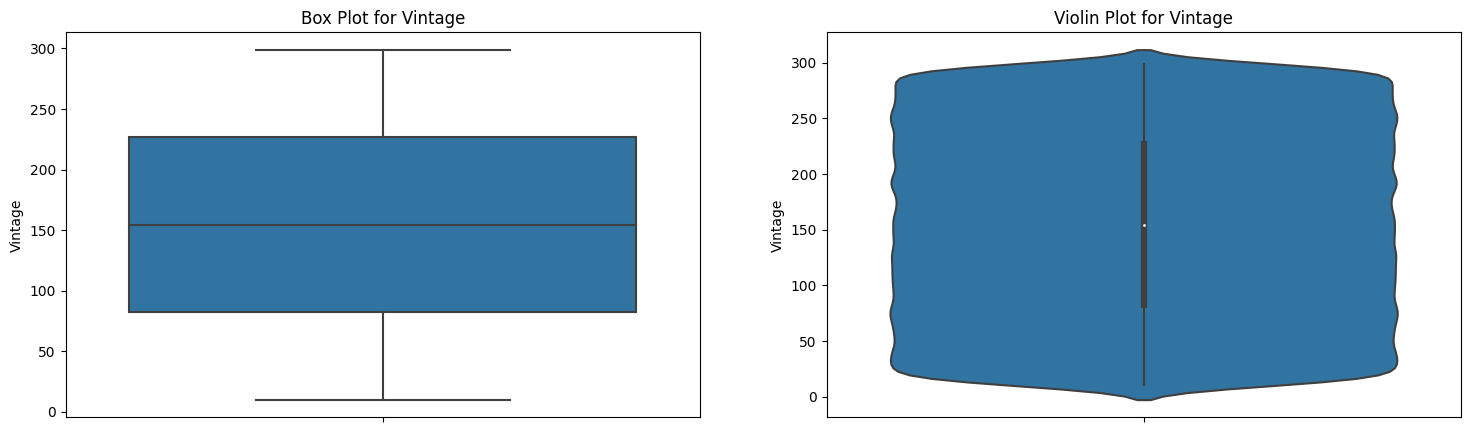

In [73]:
# Chart - 10 visualization code

# Setting display figure size
fig = plt.figure(figsize = (18,5))

# Box plot to check for the distribution of Vintage
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(y=df['Vintage'])
plt.title("Box Plot for Vintage")

# Violin plot to check for the distribution of Vintage
ax1 = plt.subplot2grid((1,2),(0,1))
sns.violinplot(y=df['Vintage'])
plt.title("Violin Plot for Vintage")

plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

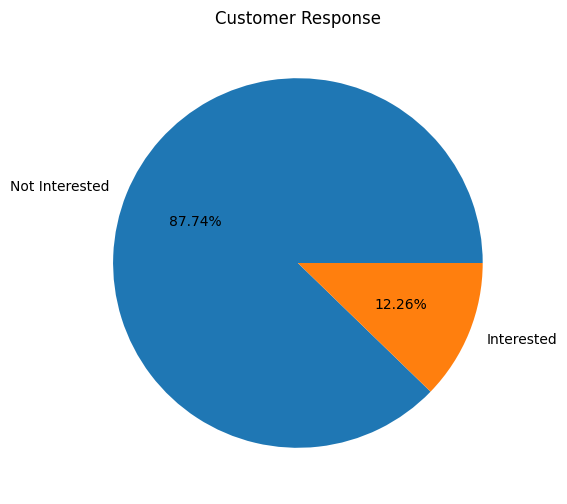

In [75]:
# Chart - 11 visualization code

# Plotting a Pie Chart to visualize the customers' response
plt.pie(df['Response'].value_counts(), labels = ['Not Interested','Interested'], autopct = "%.02f%%")

# Giving title to the plot
plt.title("Customer Response", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [76]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***